In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyDOE import *
import pickle
import random
from matplotlib.pyplot import cm
import time

# Test if simple model matches -- ok

In [2]:
# Version 1 (with nonlocal variables)

delta_t = 0.5
end_t = 100
phi = 0.25
theta = 1

SIR = pd.DataFrame({'t': np.arange(0,  end_t+delta_t, delta_t)})
SIR['S'] = 1000
SIR['I'] = 10
SIR['R'] = 0
SIR['D'] = 0

# define the transions 
def model_s(df):
    S = None
    I = None
    R = None 
    D = None
    
    def transition(row):
        nonlocal S
        nonlocal I 
        nonlocal R
        nonlocal D 
        
        previous_row_id = row.name - 1
        if row.name == 0:
            S = row['S']
            I = row['I']
            R = row['R']
            D = row['D']
            return S, I, R, D 
        delta_S = - I*delta_t
        S = S + delta_S
        R = R + I/14*delta_t*(1-0.01)
        D = D + I/14*delta_t*(0.01)
        I = I - delta_S - I/14*delta_t
        return S, I, R, D
    
    return transition

new = SIR.apply(model_s(SIR), axis=1)

new = pd.DataFrame(new)
new.to_excel('output.xlsx', index=False)

In [3]:
# Version 2 with dataframes 

delta_t = 0.5
end_t = 100
phi = 0.25
theta = 1

SIR = pd.DataFrame({'t': np.arange(0,  end_t+delta_t, delta_t)})
SIR['S'] = 1000
SIR['I'] = 10
SIR['R'] = 0
SIR['D'] = 0

for i in range(1, len(SIR)):
    SIR.loc[i, 'S'] = SIR.loc[i-1, 'S'] - SIR.loc[i-1, 'I'] * delta_t
    SIR.loc[i, 'R'] = SIR.loc[i-1, 'R'] + SIR.loc[i-1, 'I']/14*delta_t*(1-0.01)
    SIR.loc[i, 'D'] = SIR.loc[i-1, 'D'] + SIR.loc[i-1, 'I']/14*delta_t*(0.01)
    SIR.loc[i, 'I'] = SIR.loc[i-1, 'I'] + SIR.loc[i-1, 'I'] * delta_t - SIR.loc[i-1, 'I']/14*delta_t

    SIR.to_excel('output2.xlsx', index=False)

In [4]:
# Version 3 with dataframes but referencing column index 

delta_t = 0.5
end_t = 100
phi = 0.25
theta = 1

SIR = pd.DataFrame({'t': np.arange(0,  end_t+delta_t, delta_t)})
SIR['S'] = 1000
SIR['I'] = 10
SIR['R'] = 0
SIR['D'] = 0

for i in range(1, len(SIR)):
    SIR.iloc[i, 1] = SIR.iloc[i-1, 1] - SIR.iloc[i-1, 2] * delta_t
    SIR.iloc[i, 3] = SIR.iloc[i-1, 3] + SIR.iloc[i-1, 2]/14*delta_t*(1-0.01)
    SIR.iloc[i, 4] = SIR.iloc[i-1, 4] + SIR.iloc[i-1, 2]/14*delta_t*(0.01)
    SIR.iloc[i, 2] = SIR.iloc[i-1, 2] + SIR.iloc[i-1, 2] * delta_t - SIR.iloc[i-1, 2]/14*delta_t
    
SIR.to_excel('output3.xlsx', index=False)

# COVID example 

# Version 1 with nonlocal variables 

In [5]:
# Deterministic model

delta_t = 0.5
end_t = 100
phi = 0.25
theta = 1

SIR = pd.DataFrame({'t': np.arange(0,  end_t+delta_t, delta_t)})
SIR['S1n'] = 493800.0
SIR['S1d'] = 494500.0
SIR['S2n'] = 483924.0
SIR['S2d'] = 484610.0
SIR['S3n'] = 1037071.0
SIR['S3d'] = 692300.0
SIR['S4n'] = 4956288.0
SIR['S4d'] = 1240206.0
SIR['I1n'] = 700.0
SIR['I1d'] = 0
SIR['I2n'] = 686.0
SIR['I2d'] = 0
SIR['I3n'] = 1379.0
SIR['I3d'] = 0
SIR['I4n'] = 4536.0
SIR['I4d'] = 0
SIR['R1n'] = 0
SIR['R1d'] = 0
SIR['R2n'] = 0
SIR['R2d'] = 0
SIR['R3n'] = 0
SIR['R3d'] = 0
SIR['R4n'] = 0
SIR['R4d'] = 0
SIR['D1n'] = 0
SIR['D1d'] = 0
SIR['D2n'] = 0
SIR['D2d'] = 0
SIR['D3n'] = 0
SIR['D3d'] = 0
SIR['D4n'] = 0
SIR['D4d'] = 0

# define the transions 
def deterministic(df):
    S1n = None
    S1d = None
    S2n = None 
    S2d = None
    S3n = None
    S3d = None
    S4n = None 
    S4d = None
    I1n = None
    I1d = None 
    I2n = None
    I2d = None
    I3n = None
    I3d = None 
    I4n = None
    I4d = None
    R1n = None
    R1d = None
    R2n = None 
    R2d = None
    R3n = None
    R3d = None
    R4n = None 
    R4d = None
    D1n = None
    D1d = None
    D2n = None 
    D2d = None
    D3n = None
    D3d = None
    D4n = None 
    D4d = None
    
    def transition_deterministic(row):
        nonlocal S1n
        nonlocal S1d 
        nonlocal S2n
        nonlocal S2d
        nonlocal S3n
        nonlocal S3d 
        nonlocal S4n
        nonlocal S4d 
        nonlocal I1n
        nonlocal I1d
        nonlocal I2n 
        nonlocal I2d 
        nonlocal I3n
        nonlocal I3d
        nonlocal I4n
        nonlocal I4d 
        nonlocal R1n
        nonlocal R1d 
        nonlocal R2n
        nonlocal R2d
        nonlocal R3n
        nonlocal R3d 
        nonlocal R4n
        nonlocal R4d 
        nonlocal D1n
        nonlocal D1d
        nonlocal D2n 
        nonlocal D2d 
        nonlocal D3n
        nonlocal D3d
        nonlocal D4n
        nonlocal D4d 
        
        previous_row_id = row.name - 1
        if row.name == 0:
            S1n = row['S1n']
            S1d = row['S1d']
            S2n = row['S2n']
            S2d = row['S2d']
            S3n = row['S3n']
            S3d = row['S3d']
            S4n = row['S4n']
            S4d = row['S4d']
            I1n = row['I1n']
            I1d = row['I1d']
            I2n = row['I2n']
            I2d = row['I2d']
            I3n = row['I3n']
            I3d = row['I3d']
            I4n = row['I4n']
            I4d = row['I4d']
            R1n = row['R1n']
            R1d = row['R1d']
            R2n = row['R2n']
            R2d = row['R2d']
            R3n = row['R3n']
            R3d = row['R3d']
            R4n = row['R4n']
            R4d = row['R4d']
            D1n = row['D1n']
            D1d = row['D1d']
            D2n = row['D2n']
            D2d = row['D2d']
            D3n = row['D3n']
            D3d = row['D3d']
            D4n = row['D4n']
            D4d = row['D4d']
            return S1n, S1d, S2n, S2d, S3n, S3d, S4n, S4d, \
                    I1n, I1d, I2n, I2d, I3n, I3d, I4n, I4d, \
                    R1n, R1d, R2n, R2d, R3n, R3d, R3n, R3d, \
                    D1n, D1d, D2n, D2d, D3n, D3d, D4n, D4d
        N1 = S1n + S1d + I1d + I1n + R1d + R1n
        N2 = S2n + S2d + I2d + I2n + R2d + R2n
        N3 = S3n + S3d + I3d + I3n + R3d + R3n
        N4 = S4n + S4d + I4d + I4n + R4d + R4n
        delta_S1n = - S1n/N1*(0.121428571*(I1n+phi*I1d)+0.005*(I2n+phi*I2d)\
                                +0.003571429*(I3n+phi*I3d)+0.000714286*(I4n+phi*I4d))*delta_t
        delta_S1d = -S1d/N1*theta*(0.121428571*(I1n+phi*I1d)+0.005*(I2n+phi*I2d)\
                                +0.003571429*(I3n+phi*I3d)+0.000714286*(I4n+phi*I4d))*delta_t
        delta_S2n = -S2n/N2*(0.014285714*(I1n+phi*I1d)+0.136428571*(I2n+phi*I2d)\
                                +0.003571429*(I3n+phi*I3d)+0.007142857*(I4n+phi*I4d))*delta_t
        delta_S2d = -S2d/N2*theta*(0.014285714*(I1n+phi*I1d)+0.136428571*(I2n+phi*I2d)\
                                +0.003571429*(I3n+phi*I3d)+0.007142857*(I4n+phi*I4d))*delta_t
        delta_S3n = - S3n/N3*(0.014285714*(I1n+phi*I1d)+0.005*(I2n+phi*I2d)\
                                +0.180714286*(I3n+phi*I3d)+0.007142857*(I4n+phi*I4d))*delta_t
        delta_S3d = -S3d/N3*theta*(0.014285714*(I1n+phi*I1d)+0.005*(I2n+phi*I2d)\
                                +0.180714286*(I3n+phi*I3d)+0.007142857*(I4n+phi*I4d))*delta_t
        delta_S4n = -S4n/N4*(0.001428571*(I1n+phi*I1d)+0.005*(I2n+phi*I2d)\
                                +0.003571429*(I3n+phi*I3d)+0.357142857*(I4n+phi*I4d))*delta_t
        delta_S4d = -S4d/N4*theta*(0.001428571*(I1n+phi*I1d)+0.005*(I2n+phi*I2d)\
                                +0.003571429*(I3n+phi*I3d)+0.357142857*(I4n+phi*I4d))*delta_t
        S1n = S1n + delta_S1n
        S1d = S1d + delta_S1d 
        S2n = S2n + delta_S2n
        S2d = S2d + delta_S2d
        S3n = S3n + delta_S3n
        S3d = S3d + delta_S3d 
        S4n = S4n + delta_S4n
        S4d = S4d + delta_S4d
        R1n = R1n + I1n/14*delta_t*(1-0.01)
        R1d = R1d + I1d/14*delta_t*(1-0.01)
        R2n = R2n + I2n/14*delta_t*(1-0.01)
        R2d = R2d + I2d/14*delta_t*(1-0.01)
        R3n = R3n + I3n/14*delta_t*(1-0.01)
        R3d = R3d + I3d/14*delta_t*(1-0.01)
        R4n = R4n + I4n/14*delta_t*(1-0.005)
        R4d = R4d + I4d/14*delta_t*(1-0.005)
        D1n = D1n + I1n/14*delta_t*(0.01)
        D1d = D1d + I1d/14*delta_t*(0.01)
        D2n = D2n + I2n/14*delta_t*(0.01)
        D2d = D2d + I2d/14*delta_t*(0.01)
        D3n = D3n + I3n/14*delta_t*(0.01)
        D3d = D3d + I3d/14*delta_t*(0.01)
        D4n = D4n + I4n/14*delta_t*(0.005)
        D4d = D4d + I4d/14*delta_t*(0.005)
        I1n = I1n - delta_S1n*0.9 - I1n/14*delta_t
        I1d = I1d - delta_S1d - delta_S1n*0.1 - I1d/14*delta_t
        I2n = I2n - delta_S2n*0.9 - I2n/14*delta_t
        I2d = I2d - delta_S2d - delta_S2n*0.1 - I2d/14*delta_t
        I3n = I3n - delta_S3n*0.9 - I3n/14*delta_t
        I3d = I3d - delta_S3d - delta_S3n*0.1 - I3d/14*delta_t
        I4n = I4n - delta_S4n*0.9 - I4n/14*delta_t
        I4d = I4d - delta_S4d - delta_S4n*0.1 - I4d/14*delta_t
        return S1n, S1d, S2n, S2d, S3n, S3d, S4n, S4d, I1n, I1d, I2n, I2d, I3n, I3d, I4n, I4d, \
                 R1n, R1d, R2n, R2d, R3n, R3d, R4n, R4d, D1n, D1d, D2n, D2d, D3n, D3d, D4n, D4d
    
    return transition_deterministic

deterministic_SIR = SIR.apply(deterministic(SIR), axis=1)

In [6]:
deterministic_SIR = pd.DataFrame(deterministic_SIR)
df_deterministic = pd.DataFrame(deterministic_SIR[0].tolist()).fillna('')
df_deterministic.to_excel('deterministic.xlsx', index=False)
df_deterministic.head()
df_deterministic.tail()
## matches excel file (rounding errors in the order of 10^-7)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
196,338256.469384,338735.974302,125595.637415,125773.679023,229482.595073,153191.826374,99622.154073,24928.332093,24438.195831,29906.711016,...,4.287288e+06,1.666614e+06,1162.509817,1414.116677,3019.512434,3686.882677,6701.943272,5703.912801,21544.159220,8374.942466
197,337516.181609,337994.637112,125268.594334,125446.172334,228558.665144,152575.054050,99407.644065,24874.655511,24231.662120,29653.980161,...,4.289658e+06,1.667536e+06,1171.237744,1424.797646,3027.094678,3696.161566,6722.662642,5721.582706,21556.070545,8379.577423
198,336784.833936,337262.252696,124949.492576,125126.618224,227658.119902,151973.892249,99200.576092,24822.841141,24024.458522,29400.428625,...,4.291951e+06,1.668428e+06,1179.891909,1435.388353,3034.511249,3705.237713,6742.939013,5738.874816,21567.590940,8384.060262
199,336062.356355,336538.750947,124638.124669,124814.808929,226780.333426,151387.923133,99000.678636,24772.821040,23816.671969,29146.162824,...,4.294168e+06,1.669291e+06,1188.472073,1445.888506,3041.765510,3714.115235,6762.780688,5755.796214,21578.733171,8388.395949
200,335348.678030,335824.060927,124334.288972,124510.542521,225924.697506,150816.740690,98807.690917,24724.529955,23608.387034,28891.286289,...,4.296312e+06,1.670125e+06,1196.978027,1456.297850,3048.860773,3722.798183,6782.195878,5772.353900,21589.509591,8392.589292


# Deterministic model -- work here

In [26]:
# Set model parameters: 

delta_t = 0.5 ## time step
end_t = 100 ## time horizon

m = 4 ## number of population groups 

# d for distanced, n for non distanced population
alpha = [14,14,14,14]
mu = [0.01,0.01,0.01,0.005] 
# alpha_n = [14,14,14,14] ## duration of infection for non distanced individuals 
# alpha_d = [14,14,14,14] ## duration of infection for distanced individuals 
# mu_n = [0.01,0.01,0.01,0.005] 
# mu_d = [0.01,0.01,0.01,0.005]
f = [0.1,0.1,0.1,0.1]
theta = 1 ## 1-theta reduction in susceptibility 
phi = 0.25 ## 1-phi reduction in infectivity 

# Set initial population: 

# Susceptible: [Si_n, Si_d for i in range(m)]
initial_susceptible = [493800, 494500, 483924, 484610, 1037071, 692300, 4956288, 1240206] 
# Infected: [Ii_n, Ii_d for i in range(m)]
initial_infected = [700, 0, 686, 0, 1379, 0, 4536, 0]
# Recovered: [Ri_n, Ri_d for i in range(m)]
initial_recovered = [0] * 2*m
# Dead: [Di_n, Di_d for i in range(m)]
initial_dead = [0] * 2*m
## Create initial population vector: [S1_n, S1_d, ... Sm_n, Sm_d, I1_n, I1_d, ... R1_n, R1_d, .... D1_n, D1_d ...] 
initial_population = initial_susceptible + initial_infected + initial_recovered + initial_dead

# Contact matrix for non-distanced individuals: (m * m)
C_n = [[0.121428571, 0.014285714, 0.014285714, 0.001428571], 
        [0.005, 0.136428571, 0.005, 0.005], 
        [0.003571429, 0.003571429, 0.180714286, 0.003571429],
        [0.000714286, 0.007142857, 0.007142857, 0.357142857]]
# Contact matrix for distanced individuals: (m * m)
C_d = [[0.121428571, 0.014285714, 0.014285714, 0.001428571], 
        [0.005, 0.136428571, 0.005, 0.005], 
        [0.003571429, 0.003571429, 0.180714286, 0.003571429],
        [0.000714286, 0.007142857, 0.007142857, 0.357142857]]

# Initialize the dataframe  
SIR = pd.DataFrame({'t': np.arange(0,  end_t+delta_t, delta_t)}) ## time range
# Initialize population 
for i in range(1, 2*4*m+1):
    SIR[i] = initial_population[i-1]

# define the transions 
def deterministic(df):
    P = None 
#     Sin = None 
#     Sid = None
#     Iin = None
#     Iid = None
#     Rin = None
#     Rid = None 
#     Din = None
#     Did = None 
#     N = None 
#     Ijn = None
#     Ijd = None
    
    def transition_deterministic(row):
        nonlocal P
#         nonlocal Sin 
#         nonlocal Sid
#         nonlocal Iin
#         nonlocal Iid
#         nonlocal Rin 
#         nonlocal Rid
#         nonlocal Din
#         nonlocal Did
#         nonlocal N
#         nonlocal Ijn 
#         nonlocal Ijd
        
        previous_row_id = row.name - 1
        if row.name == 0:
            P = row
            return P 
        print(previous_row_id)
        N = np.zeros(m)
        delta_Sn = np.zeros(m)
        delta_Sd = np.zeros(m)
        
        for i in range(m): 
            Sin = P[1+2*i]
            Sid = P[2+2*i]
            Iin = P[2*m+1+2*i]
            Iid = P[2*m+2+2*i]
            Rin = P[4*m+1+2*i]
            Rid = P[4*m+2+2*i]
            Din = P[6*m+1+2*i]
            Did = P[6*m+2+2*i]
            N[i] = Sin + Sid + Iin + Iid + Rin + Rid
            for j in range(m):
                Ijn = P[2*m+1+2*j]
                Ijd = P[2*m+2+2*j]
                delta_Sn[i] += -Sin/N[i]*C_n[j][i]*(Ijn + phi*Ijd)*delta_t
                delta_Sd[i] += -theta*Sid/N[i]*C_d[j][i]*(Ijn + phi*Ijd)*delta_t

            # Transition for Si_n
            P[1+2*i] = Sin + delta_Sn[i]
            # Transition for Si_d
            P[2+2*i] = Sid + delta_Sd[i] 
            # Transition for Ii_n 
            P[2*m+1+2*i] = Iin - delta_Sn[i]*(1-f[i]) - Iin/alpha[i]*delta_t
            # Transition for Ii_d 
            P[2*m+2+2*i] = Iid - delta_Sd[i] - delta_Sn[i]*f[i] - Iid/alpha[i]*delta_t
            # Transition for Ri_n 
            P[4*m+1+2*i] = Rin + Iin/alpha[i]*delta_t*(1-mu[i])
            # Transition for Ri_d 
            P[4*m+2+2*i] = Rid + Iid/alpha[i]*delta_t*(1-mu[i])
            # Transition for Di_n 
            P[6*m+1+2*i] = Din + Iin/alpha[i]*delta_t*mu[i]
            # Transition for Di_d 
            P[6*m+2+2*i] = Did + Iid/alpha[i]*delta_t*mu[i]
            
#         print(P)
        return P
    
    return transition_deterministic

new = SIR.apply(deterministic(SIR), axis=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [27]:
new

,t,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,493800.000000,494500.00000,483924.000000,484610.00000,1.037071e+06,692300.000000,4.956288e+06,1.240206e+06,700.00000,...,0.00,0.0,0.00,0.0,0.000,0.0,0.0000,0.0,0.00,0.0
1,0.5,493775.885434,494475.85125,483888.809196,484574.75931,1.036983e+06,692240.966587,4.955637e+06,1.240043e+06,696.70311,...,161.19,0.0,0.25,0.0,0.245,0.0,0.4925,0.0,0.81,0.0
2,1.0,493775.885434,494475.85125,483888.809196,484574.75931,1.036983e+06,692240.966587,4.955637e+06,1.240043e+06,696.70311,...,161.19,0.0,0.25,0.0,0.245,0.0,0.4925,0.0,0.81,0.0
3,1.5,493775.885434,494475.85125,483888.809196,484574.75931,1.036983e+06,692240.966587,4.955637e+06,1.240043e+06,696.70311,...,161.19,0.0,0.25,0.0,0.245,0.0,0.4925,0.0,0.81,0.0
4,2.0,493775.885434,494475.85125,483888.809196,484574.75931,1.036983e+06,692240.966587,4.955637e+06,1.240043e+06,696.70311,...,161.19,0.0,0.25,0.0,0.245,0.0,0.4925,0.0,0.81,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,98.0,493775.885434,494475.85125,483888.809196,484574.75931,1.036983e+06,692240.966587,4.955637e+06,1.240043e+06,696.70311,...,161.19,0.0,0.25,0.0,0.245,0.0,0.4925,0.0,0.81,0.0
197,98.5,493775.885434,494475.85125,483888.809196,484574.75931,1.036983e+06,692240.966587,4.955637e+06,1.240043e+06,696.70311,...,161.19,0.0,0.25,0.0,0.245,0.0,0.4925,0.0,0.81,0.0
198,99.0,493775.885434,494475.85125,483888.809196,484574.75931,1.036983e+06,692240.966587,4.955637e+06,1.240043e+06,696.70311,...,161.19,0.0,0.25,0.0,0.245,0.0,0.4925,0.0,0.81,0.0
199,99.5,493775.885434,494475.85125,483888.809196,484574.75931,1.036983e+06,692240.966587,4.955637e+06,1.240043e+06,696.70311,...,161.19,0.0,0.25,0.0,0.245,0.0,0.4925,0.0,0.81,0.0


In [8]:
# Set model parameters: 

delta_t = 0.5 ## time step
end_t = 100 ## time horizon

m = 4 ## number of population groups 

# d for distanced, n for non distanced population
alpha = [14,14,14,14]
mu = [0.01,0.01,0.01,0.005] 
# alpha_n = [14,14,14,14] ## duration of infection for non distanced individuals 
# alpha_d = [14,14,14,14] ## duration of infection for distanced individuals 
# mu_n = [0.01,0.01,0.01,0.005] 
# mu_d = [0.01,0.01,0.01,0.005]
f = [0.1,0.1,0.1,0.1]
theta = 1 ## 1-theta reduction in susceptibility 
phi = 0.25 ## 1-phi reduction in infectivity 

# Set initial population: 

# Susceptible: [Si_n, Si_d for i in range(m)]
initial_susceptible = [493800, 494500, 483924, 484610, 1037071, 692300, 4956288, 1240206] 
# Infected: [Ii_n, Ii_d for i in range(m)]
initial_infected = [700, 0, 686, 0, 1379, 0, 4536, 0]
# Recovered: [Ri_n, Ri_d for i in range(m)]
initial_recovered = [0] * 2*m
# Dead: [Di_n, Di_d for i in range(m)]
initial_dead = [0] * 2*m
## Create initial population vector: [S1_n, S1_d, ... Sm_n, Sm_d, I1_n, I1_d, ... R1_n, R1_d, .... D1_n, D1_d ...] 
initial_population = initial_susceptible + initial_infected + initial_recovered + initial_dead

# Contact matrix for non-distanced individuals: (m * m)
C_n = [[0.121428571, 0.014285714, 0.014285714, 0.001428571], 
        [0.005, 0.136428571, 0.005, 0.005], 
        [0.003571429, 0.003571429, 0.180714286, 0.003571429],
        [0.000714286, 0.007142857, 0.007142857, 0.357142857]]
# Contact matrix for distanced individuals: (m * m)
C_d = [[0.121428571, 0.014285714, 0.014285714, 0.001428571], 
        [0.005, 0.136428571, 0.005, 0.005], 
        [0.003571429, 0.003571429, 0.180714286, 0.003571429],
        [0.000714286, 0.007142857, 0.007142857, 0.357142857]]

# Initialize the dataframe  
SIR = pd.DataFrame({'t': np.arange(0,  end_t+delta_t, delta_t)}) ## time range
# Initialize population 
for i in range(1, 2*4*m+1):
    SIR[i] = initial_population[i-1]

# define the transions 
def deterministic(df):
    P = df.iloc[0] ## set equal to first row 

    def transition_deterministic(row):
        nonlocal P
        
        N = np.zeros(m)
        delta_Sn = np.zeros(m)
        delta_Sd = np.zeros(m)
        
        for i in range(m): 
            Sin = P[1+2*i]
            Sid = P[2+2*i]
            Iin = P[2*m+1+2*i]
            Iid = P[2*m+2+2*i]
            Rin = P[4*m+1+2*i]
            Rid = P[4*m+2+2*i]
            Din = P[6*m+1+2*i]
            Did = P[6*m+2+2*i]
            if i == 0: 
                print(Sin)
            N[i] = Sin + Sid + Iin + Iid + Rin + Rid
            for j in range(m):
                Ijn = P[2*m+1+2*j]
                Ijd = P[2*m+2+2*j]
                delta_Sn[i] += -Sin/N[i]*C_n[j][i]*(Ijn + phi*Ijd)*delta_t
                delta_Sd[i] += -theta*Sid/N[i]*C_d[j][i]*(Ijn + phi*Ijd)*delta_t

            # Transition for Si_n
            P[1+2*i] = Sin + delta_Sn[i]
            # Transition for Si_d
            P[2+2*i] = Sid + delta_Sd[i] 
            # Transition for Ii_n 
            P[2*m+1+2*i] = Iin - delta_Sn[i]*(1-f[i]) - Iin/alpha[i]*delta_t
            # Transition for Ii_d 
            P[2*m+2+2*i] = Iid - delta_Sd[i] - delta_Sn[i]*f[i] - Iid/alpha[i]*delta_t
            # Transition for Ri_n 
            P[4*m+1+2*i] = Rin + Iin/alpha[i]*delta_t*(1-mu[i])
            # Transition for Ri_d 
            P[4*m+2+2*i] = Rid + Iid/alpha[i]*delta_t*(1-mu[i])
            # Transition for Di_n 
            P[6*m+1+2*i] = Din + Iin/alpha[i]*delta_t*mu[i]
            # Transition for Di_d 
            P[6*m+2+2*i] = Did + Iid/alpha[i]*delta_t*mu[i]
            
#         print(P)
        return P
    
    return transition_deterministic

deterministic_SIR2 = SIR.apply(deterministic(SIR), axis=1)

493800.0
493775.88543388085
493751.521681849
493726.8910428752
493701.97413455625
493676.7497218084
493651.19452806754
493625.2830272598
493598.9872146452
493572.2763544653
493545.11670214176
493517.4711985764
493489.2991338947
493460.55577775673
493431.1919731284
493401.15369016863
493370.38153664354
493338.8102210319
493306.36796423886
493272.9758555966
493238.5471486047
493202.98649166164
493166.1890888702
493128.0397858828
493088.41207569925
493047.1670193659
493004.15207667364
492959.199842246
492912.1266828804
492862.7312727024
492810.79302366043
492756.070410182
492698.2991885009
492637.1905133099
492572.42895707936
492503.670440682
492430.54008796404
492352.6300216814
492269.4971238441
492180.6607900427
492085.600714792
491983.7547533079
491874.51691437274
491757.2355488954
491631.21180921065
491495.69846473023
491349.8991697745
491192.9682886358
491024.0113903422
490842.08653023595
490646.20643623045
490435.341713248
490208.4251686129
489964.35734291124
489702.01330407866
4894

In [9]:
deterministic_SIR2

,t,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,334618.495758,335092.843565,123987.255648,124163.01725,224982.557054,150187.811875,98615.11936,24676.343005,23396.318321,...,4.298410e+06,1.670942e+06,1205.670355,1466.935285,3056.419264,3732.048036,6802.908464,5790.018065,21600.052176,8396.691648
1,0.0,334618.495758,335092.843565,123987.255648,124163.01725,224982.557054,150187.811875,98615.11936,24676.343005,23396.318321,...,4.298410e+06,1.670942e+06,1205.670355,1466.935285,3056.419264,3732.048036,6802.908464,5790.018065,21600.052176,8396.691648
2,0.0,334618.495758,335092.843565,123987.255648,124163.01725,224982.557054,150187.811875,98615.11936,24676.343005,23396.318321,...,4.298410e+06,1.670942e+06,1205.670355,1466.935285,3056.419264,3732.048036,6802.908464,5790.018065,21600.052176,8396.691648
3,0.0,334618.495758,335092.843565,123987.255648,124163.01725,224982.557054,150187.811875,98615.11936,24676.343005,23396.318321,...,4.298410e+06,1.670942e+06,1205.670355,1466.935285,3056.419264,3732.048036,6802.908464,5790.018065,21600.052176,8396.691648
4,0.0,334618.495758,335092.843565,123987.255648,124163.01725,224982.557054,150187.811875,98615.11936,24676.343005,23396.318321,...,4.298410e+06,1.670942e+06,1205.670355,1466.935285,3056.419264,3732.048036,6802.908464,5790.018065,21600.052176,8396.691648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.0,334618.495758,335092.843565,123987.255648,124163.01725,224982.557054,150187.811875,98615.11936,24676.343005,23396.318321,...,4.298410e+06,1.670942e+06,1205.670355,1466.935285,3056.419264,3732.048036,6802.908464,5790.018065,21600.052176,8396.691648
197,0.0,334618.495758,335092.843565,123987.255648,124163.01725,224982.557054,150187.811875,98615.11936,24676.343005,23396.318321,...,4.298410e+06,1.670942e+06,1205.670355,1466.935285,3056.419264,3732.048036,6802.908464,5790.018065,21600.052176,8396.691648
198,0.0,334618.495758,335092.843565,123987.255648,124163.01725,224982.557054,150187.811875,98615.11936,24676.343005,23396.318321,...,4.298410e+06,1.670942e+06,1205.670355,1466.935285,3056.419264,3732.048036,6802.908464,5790.018065,21600.052176,8396.691648
199,0.0,334618.495758,335092.843565,123987.255648,124163.01725,224982.557054,150187.811875,98615.11936,24676.343005,23396.318321,...,4.298410e+06,1.670942e+06,1205.670355,1466.935285,3056.419264,3732.048036,6802.908464,5790.018065,21600.052176,8396.691648


In [10]:
df_deterministic

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,493800.000000,494500.000000,483924.000000,484610.000000,1.037071e+06,692300.000000,4.956288e+06,1.240206e+06,700.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,493775.885434,494475.851250,483888.821119,484574.771250,1.036983e+06,692240.993000,4.955637e+06,1.240043e+06,696.703110,26.560207,...,1.611900e+02,0.000000e+00,0.250000,0.000000,0.245000,0.000000,0.492500,0.000000,0.810000,0.000000
2,493751.521756,494451.453034,483852.159227,484538.057387,1.036891e+06,692179.569312,4.954917e+06,1.239863e+06,693.748166,52.446211,...,3.374483e+02,8.103923e+00,0.498823,0.009486,0.492557,0.013838,0.995823,0.024231,1.695720,0.040723
3,493726.891276,494426.787638,483813.882877,484499.726777,1.036795e+06,692115.573772,4.954121e+06,1.239664e+06,691.138878,77.701576,...,5.304327e+02,2.487694e+01,0.746590,0.028217,0.743058,0.041603,1.510745,0.072819,2.665491,0.125010
4,493701.974622,494401.835664,483773.847146,484459.634293,1.036695e+06,692048.837319,4.953242e+06,1.239444e+06,688.880335,102.370160,...,7.419724e+02,5.095366e+01,0.993425,0.055967,0.996915,0.083434,2.038092,0.145952,3.728505,0.256049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,338256.469384,338735.974302,125595.637415,125773.679023,2.294826e+05,153191.826374,9.962215e+04,2.492833e+04,24438.195831,29906.711016,...,4.287288e+06,1.666614e+06,1162.509817,1414.116677,3019.512434,3686.882677,6701.943272,5703.912801,21544.159220,8374.942466
197,337516.181609,337994.637112,125268.594334,125446.172334,2.285587e+05,152575.054050,9.940764e+04,2.487466e+04,24231.662120,29653.980161,...,4.289658e+06,1.667536e+06,1171.237744,1424.797646,3027.094678,3696.161566,6722.662642,5721.582706,21556.070545,8379.577423
198,336784.833936,337262.252696,124949.492576,125126.618224,2.276581e+05,151973.892249,9.920058e+04,2.482284e+04,24024.458522,29400.428625,...,4.291951e+06,1.668428e+06,1179.891909,1435.388353,3034.511249,3705.237713,6742.939013,5738.874816,21567.590940,8384.060262
199,336062.356355,336538.750947,124638.124669,124814.808929,2.267803e+05,151387.923133,9.900068e+04,2.477282e+04,23816.671969,29146.162824,...,4.294168e+06,1.669291e+06,1188.472073,1445.888506,3041.765510,3714.115235,6762.780688,5755.796214,21578.733171,8388.395949


In [11]:
# Version 1 with nonlocal variables 

# Stochastic model 

delta_t = 0.5
end_t = 100
phi = 0.25
theta = 1

SIR = pd.DataFrame({'t': np.arange(0,  end_t+delta_t, delta_t)})
SIR['S1n'] = 493800.0
SIR['S1d'] = 494500.0
SIR['S2n'] = 483924.0
SIR['S2d'] = 484610.0
SIR['S3n'] = 1037071.0
SIR['S3d'] = 692300.0
SIR['S4n'] = 4956288.0
SIR['S4d'] = 1240206.0
SIR['I1n'] = 700.0
SIR['I1d'] = 0
SIR['I2n'] = 686.0
SIR['I2d'] = 0
SIR['I3n'] = 1379.0
SIR['I3d'] = 0
SIR['I4n'] = 4536.0
SIR['I4d'] = 0
SIR['R1n'] = 0
SIR['R1d'] = 0
SIR['R2n'] = 0
SIR['R2d'] = 0
SIR['R3n'] = 0
SIR['R3d'] = 0
SIR['R4n'] = 0
SIR['R4d'] = 0
SIR['D1n'] = 0
SIR['D1d'] = 0
SIR['D2n'] = 0
SIR['D2d'] = 0
SIR['D3n'] = 0
SIR['D3d'] = 0
SIR['D4n'] = 0
SIR['D4d'] = 0

# define the transions 
def stochastic(df):
    S1n = None
    S1d = None
    S2n = None 
    S2d = None
    S3n = None
    S3d = None
    S4n = None 
    S4d = None
    I1n = None
    I1d = None 
    I2n = None
    I2d = None
    I3n = None
    I3d = None 
    I4n = None
    I4d = None
    R1n = None
    R1d = None
    R2n = None 
    R2d = None
    R3n = None
    R3d = None
    R4n = None 
    R4d = None
    D1n = None
    D1d = None
    D2n = None 
    D2d = None
    D3n = None
    D3d = None
    D4n = None 
    D4d = None
    
    def transition_stochastic(row):
        nonlocal S1n
        nonlocal S1d 
        nonlocal S2n
        nonlocal S2d
        nonlocal S3n
        nonlocal S3d 
        nonlocal S4n
        nonlocal S4d 
        nonlocal I1n
        nonlocal I1d
        nonlocal I2n 
        nonlocal I2d 
        nonlocal I3n
        nonlocal I3d
        nonlocal I4n
        nonlocal I4d 
        nonlocal R1n
        nonlocal R1d 
        nonlocal R2n
        nonlocal R2d
        nonlocal R3n
        nonlocal R3d 
        nonlocal R4n
        nonlocal R4d 
        nonlocal D1n
        nonlocal D1d
        nonlocal D2n 
        nonlocal D2d 
        nonlocal D3n
        nonlocal D3d
        nonlocal D4n
        nonlocal D4d 
        
        previous_row_id = row.name - 1
        if row.name == 0:
            S1n = row['S1n']
            S1d = row['S1d']
            S2n = row['S2n']
            S2d = row['S2d']
            S3n = row['S3n']
            S3d = row['S3d']
            S4n = row['S4n']
            S4d = row['S4d']
            I1n = row['I1n']
            I1d = row['I1d']
            I2n = row['I2n']
            I2d = row['I2d']
            I3n = row['I3n']
            I3d = row['I3d']
            I4n = row['I4n']
            I4d = row['I4d']
            R1n = row['R1n']
            R1d = row['R1d']
            R2n = row['R2n']
            R2d = row['R2d']
            R3n = row['R3n']
            R3d = row['R3d']
            R4n = row['R4n']
            R4d = row['R4d']
            D1n = row['D1n']
            D1d = row['D1d']
            D2n = row['D2n']
            D2d = row['D2d']
            D3n = row['D3n']
            D3d = row['D3d']
            D4n = row['D4n']
            D4d = row['D4d']
            return S1n, S1d, S2n, S2d, S3n, S3d, S4n, S4d, \
                    I1n, I1d, I2n, I2d, I3n, I3d, I4n, I4d, \
                    R1n, R1d, R2n, R2d, R3n, R3d, R3n, R3d, \
                    D1n, D1d, D2n, D2d, D3n, D3d, D4n, D4d
        N1 = S1n + S1d + I1d + I1n + R1d + R1n
        N2 = S2n + S2d + I2d + I2n + R2d + R2n
        N3 = S3n + S3d + I3d + I3n + R3d + R3n
        N4 = S4n + S4d + I4d + I4n + R4d + R4n
        delta_S1n = - np.random.binomial(S1n, 1/N1*(0.121428571*(I1n+phi*I1d)+0.005*(I2n+phi*I2d)\
                                +0.003571429*(I3n+phi*I3d)+0.000714286*(I4n+phi*I4d))*delta_t)
        delta_S1d = - np.random.binomial(S1d, 1/N1*theta*(0.121428571*(I1n+phi*I1d)+0.005*(I2n+phi*I2d)\
                                +0.003571429*(I3n+phi*I3d)+0.000714286*(I4n+phi*I4d))*delta_t)
        delta_S2n = - np.random.binomial(S2n, 1/N2*(0.014285714*(I1n+phi*I1d)+0.136428571*(I2n+phi*I2d)\
                                +0.003571429*(I3n+phi*I3d)+0.007142857*(I4n+phi*I4d))*delta_t)
        delta_S2d = - np.random.binomial(S2d, 1/N2*theta*(0.014285714*(I1n+phi*I1d)+0.136428571*(I2n+phi*I2d)\
                                +0.003571429*(I3n+phi*I3d)+0.007142857*(I4n+phi*I4d))*delta_t)
        delta_S3n = - np.random.binomial(S3n, 1/N3*(0.014285714*(I1n+phi*I1d)+0.005*(I2n+phi*I2d)\
                                +0.180714286*(I3n+phi*I3d)+0.007142857*(I4n+phi*I4d))*delta_t)
        delta_S3d = - np.random.binomial(S3d, 1/N3*theta*(0.014285714*(I1n+phi*I1d)+0.005*(I2n+phi*I2d)\
                                +0.180714286*(I3n+phi*I3d)+0.007142857*(I4n+phi*I4d))*delta_t)
        delta_S4n = - np.random.binomial(S4n, 1/N4*(0.001428571*(I1n+phi*I1d)+0.005*(I2n+phi*I2d)\
                                +0.003571429*(I3n+phi*I3d)+0.357142857*(I4n+phi*I4d))*delta_t)
        delta_S4d = - np.random.binomial(S4d, 1/N4*theta*(0.001428571*(I1n+phi*I1d)+0.005*(I2n+phi*I2d)\
                                +0.003571429*(I3n+phi*I3d)+0.357142857*(I4n+phi*I4d))*delta_t)
        delta_R1n = np.random.binomial(I1n, 1/14*delta_t*(1-0.01))
        delta_R1d = np.random.binomial(I1d, 1/14*delta_t*(1-0.01))
        delta_R2n = np.random.binomial(I2n, 1/14*delta_t*(1-0.01))
        delta_R2d = np.random.binomial(I2d, 1/14*delta_t*(1-0.01))
        delta_R3n = np.random.binomial(I3n, 1/14*delta_t*(1-0.01))
        delta_R3d = np.random.binomial(I3d, 1/14*delta_t*(1-0.01))
        delta_R4n = np.random.binomial(I4n, 1/14*delta_t*(1-0.005))
        delta_R4d = np.random.binomial(I4d, 1/14*delta_t*(1-0.005))
        delta_D1n = np.random.binomial(I1n, 1/14*delta_t*(0.01))
        delta_D1d = np.random.binomial(I1d, 1/14*delta_t*(0.01))
        delta_D2n = np.random.binomial(I2n, 1/14*delta_t*(0.01))
        delta_D2d = np.random.binomial(I2d, 1/14*delta_t*(0.01))
        delta_D3n = np.random.binomial(I3n, 1/14*delta_t*(0.01))
        delta_D3d = np.random.binomial(I3d, 1/14*delta_t*(0.01))
        delta_D4n = np.random.binomial(I4n, 1/14*delta_t*(0.005))
        delta_D4d = np.random.binomial(I4d, 1/14*delta_t*(0.005))
        SW1 = np.random.binomial(-delta_S1n, 0.9)
        SW2 = np.random.binomial(-delta_S2n, 0.9)
        SW3 = np.random.binomial(-delta_S3n, 0.9)
        SW4 = np.random.binomial(-delta_S4n, 0.9)
        
        S1n = S1n + delta_S1n
        S1d = S1d + delta_S1d 
        S2n = S2n + delta_S2n
        S2d = S2d + delta_S2d
        S3n = S3n + delta_S3n
        S3d = S3d + delta_S3d 
        S4n = S4n + delta_S4n
        S4d = S4d + delta_S4d
        R1n = R1n + delta_R1n
        R1d = R1d + delta_R1d 
        R2n = R2n + delta_R2n
        R2d = R2d + delta_R2d
        R3n = R3n + delta_R3n
        R3d = R3d + delta_R3d
        R4n = R4n + delta_R4n
        R4d = R4d + delta_R4d
        D1n = D1n + delta_D1n
        D1d = D1d + delta_D1d
        D2n = D2n + delta_D2n
        D2d = D2d + delta_D2d
        D3n = D3n + delta_D3n
        D3d = D3d + delta_D3d
        D4n = D4n + delta_D4n
        D4d = D4d + delta_D4d
        I1n = I1n + SW1 - delta_R1n - delta_D1n
        I1d = I1d - delta_S1d - delta_S1n - SW1 - delta_R1d - delta_D1d
        I2n = I2n + SW2 - delta_R2n - delta_D2n
        I2d = I2d - delta_S2d - delta_S2n - SW2 - delta_R2d - delta_D2d
        I3n = I3n + SW3 - delta_R3n - delta_D3n
        I3d = I3d - delta_S3d - delta_S3n - SW3 - delta_R3d - delta_D3d
        I4n = I4n + SW4 - delta_R4n - delta_D4n
        I4d = I4d - delta_S4d - delta_S4n - SW4 - delta_R4d - delta_D4d
        return S1n, S1d, S2n, S2d, S3n, S3d, S4n, S4d, I1n, I1d, I2n, I2d, I3n, I3d, I4n, I4d, \
                 R1n, R1d, R2n, R2d, R3n, R3d, R4n, R4d, D1n, D1d, D2n, D2d, D3n, D3d, D4n, D4d
    
    return transition_stochastic

stochastic_SIR = SIR.apply(stochastic(SIR), axis=1)

In [12]:
# print(stochastic_SIR)
stochastic_SIR = pd.DataFrame(stochastic_SIR)
df_stochastic = pd.DataFrame(stochastic_SIR[0].tolist()).fillna('')
df_stochastic.to_excel('stochastic.xlsx', index=False)

df_stochastic.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,493800.0,494500.0,483924.0,484610.0,1037071.0,692300.0,4956288.0,1240206.0,700.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,493781.0,494479.0,483894.0,484566.0,1036986.0,692251.0,4955615.0,1240045.0,694.0,23.0,...,160.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,493761.0,494458.0,483854.0,484530.0,1036904.0,692194.0,4954887.0,1239880.0,676.0,45.0,...,331.0,6.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0
3,493737.0,494436.0,483802.0,484494.0,1036811.0,692123.0,4954100.0,1239685.0,673.0,68.0,...,531.0,27.0,1.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0
4,493705.0,494417.0,483766.0,484462.0,1036706.0,692056.0,4953206.0,1239470.0,672.0,91.0,...,735.0,48.0,2.0,0.0,0.0,0.0,4.0,0.0,6.0,0.0


In [13]:
# Loop

start_time = time.time()

n_iter = 100

dataset = []
for i in range(n_iter):
    stochastic_SIR = SIR.apply(stochastic(SIR), axis=1)
    stochastic_SIR = pd.DataFrame(stochastic_SIR)
    df_stochastic = pd.DataFrame(stochastic_SIR[0].tolist()).fillna('')
    dataset.append(df_stochastic)
final_dataset = pd.concat(dataset)

by_row_index = final_dataset.groupby(final_dataset.index)
df_means = by_row_index.mean()

print("My program took", time.time() - start_time, "to run")

df_means.head()

My program took 2.6854841709136963 to run


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,493800.00,494500.00,483924.00,484610.00,1037071.00,692300.00,4956288.00,1240206.00,700.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,493775.45,494475.84,483889.18,484575.88,1036981.23,692241.38,4955639.06,1240042.21,697.19,26.52,...,160.20,0.00,0.19,0.00,0.24,0.00,0.43,0.00,0.85,0.00
2,493751.10,494451.43,483853.46,484538.87,1036888.95,692178.99,4954923.81,1239861.93,693.85,52.32,...,335.44,8.32,0.56,0.01,0.48,0.00,0.86,0.03,1.67,0.04
3,493726.45,494426.33,483814.83,484500.92,1036792.74,692114.22,4954120.65,1239664.05,690.18,78.20,...,528.85,24.79,0.85,0.01,0.71,0.02,1.44,0.08,2.72,0.11
4,493701.96,494400.25,483774.03,484460.87,1036692.43,692045.94,4953237.02,1239444.16,687.50,103.51,...,742.55,50.49,1.11,0.05,0.99,0.08,1.95,0.11,3.86,0.22


In [ ]:
for i in range(n_iter): 
    print(dataset[0].equals(dataset[i]))

In [ ]:
# Plots

# Infections by group 

fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[8]+df_means[9], '-b', label = 'Group 1')
ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[10]+df_means[11], '-r', label = 'Group 2')
ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[12]+df_means[13], '-g', label = 'Group 3')
ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[14]+df_means[15], '-k', label = 'Group 4') 
ax.set_xlabel('Days')
ax.set_ylabel('Infections')
plt.legend(loc=0)

plt.title('Stochastic')
plt.tight_layout()
plt.show()

# Deaths by group 

fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[24]+df_means[25], '-b', label = 'Group 1')
ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[26]+df_means[27], '-r', label = 'Group 2')
ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[28]+df_means[29], '-g', label = 'Group 3')
ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[30]+df_means[31], '-k', label = 'Group 4') 
ax.set_xlabel('Days')
ax.set_ylabel('Deaths')
plt.legend(loc=0)

plt.title('Stochastic')
plt.tight_layout()
plt.show()


In [ ]:
# Plots 

# Infections by group 

fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_deterministic[8]+df_deterministic[9], '-b', label = 'Group 1')
ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_deterministic[10]+df_deterministic[11], '-r', label = 'Group 2')
ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_deterministic[12]+df_deterministic[13], '-g', label = 'Group 3')
ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_deterministic[14]+df_deterministic[15], '-k', label = 'Group 4') 
ax.set_xlabel('Days')
ax.set_ylabel('Infections')
plt.legend(loc=0)

plt.title('Deterministic')
plt.tight_layout()
plt.show()

# Deaths by group 

fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_deterministic[24]+df_deterministic[25], '-b', label = 'Group 1')
ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_deterministic[26]+df_deterministic[27], '-r', label = 'Group 2')
ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_deterministic[28]+df_deterministic[29], '-g', label = 'Group 3')
ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_deterministic[30]+df_deterministic[31], '-k', label = 'Group 4') 
ax.set_xlabel('Days')
ax.set_ylabel('Deaths')
plt.legend(loc=0)

plt.title('Deterministic')
plt.tight_layout()
plt.show()


In [ ]:
color = cm.rainbow(np.linspace(0, 1, m))

# Infections by group 

fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for k in range(n_iter): 
    for i,c in enumerate(color):
        if k == 0: 
            ax.plot(np.arange(0,  end_t+delta_t, delta_t), dataset[k][2*m+2*i]+dataset[k][2*m+1+2*i], c=c, label = f'Group {i+1}')
        else: 
            ax.plot(np.arange(0,  end_t+delta_t, delta_t), dataset[k][2*m+2*i]+dataset[k][2*m+1+2*i], c=c)
    ax.set_xlabel('Days')
    ax.set_ylabel('Infections')
    plt.legend(loc=0)

plt.title('Stochastic model')
plt.tight_layout()
plt.show()

# Deaths by group 

fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for k in range(n_iter): 
    for i,c in enumerate(color):
        if k == 0: 
            ax.plot(np.arange(0,  end_t+delta_t, delta_t), dataset[k][6*m+2*i]+dataset[k][6*m+1+2*i], c=c, label = f'Group {i+1}')
        else: 
            ax.plot(np.arange(0,  end_t+delta_t, delta_t), dataset[k][6*m+2*i]+dataset[k][6*m+1+2*i], c=c)
ax.set_xlabel('Days')
ax.set_ylabel('Deaths')
plt.legend(loc=0)

plt.title('Stochastic model')
plt.tight_layout()
plt.show()


# General version using dataframe

In [37]:
# Set model parameters: 

delta_t = 0.5 ## time step
end_t = 100 ## time horizon

m = 4 ## number of population groups 

# d for distanced, n for non distanced population
alpha = [14,14,14,14]
mu = [0.01,0.01,0.01,0.005] 
# alpha_n = [14,14,14,14] ## duration of infection for non distanced individuals 
# alpha_d = [14,14,14,14] ## duration of infection for distanced individuals 
# mu_n = [0.01,0.01,0.01,0.005] 
# mu_d = [0.01,0.01,0.01,0.005]
f = [0.1,0.1,0.1,0.1]
theta = 1 ## 1-theta reduction in susceptibility 
phi = 0.25 ## 1-phi reduction in infectivity 

# Set initial population: 

# Susceptible: [Si_n, Si_d for i in range(m)]
initial_susceptible = [493800, 494500, 483924, 484610, 1037071, 692300, 4956288, 1240206] 
# Infected: [Ii_n, Ii_d for i in range(m)]
initial_infected = [700, 0, 686, 0, 1379, 0, 4536, 0]
# Recovered: [Ri_n, Ri_d for i in range(m)]
initial_recovered = [0] * 2*m
# Dead: [Di_n, Di_d for i in range(m)]
initial_dead = [0] * 2*m
## Create initial population vector: [S1_n, S1_d, ... Sm_n, Sm_d, I1_n, I1_d, ... R1_n, R1_d, .... D1_n, D1_d ...] 
initial_population = initial_susceptible + initial_infected + initial_recovered + initial_dead

# Contact matrix for non-distanced individuals: (m * m)
C_n = [[0.121428571, 0.014285714, 0.014285714, 0.001428571], 
        [0.005, 0.136428571, 0.005, 0.005], 
        [0.003571429, 0.003571429, 0.180714286, 0.003571429],
        [0.000714286, 0.007142857, 0.007142857, 0.357142857]]
# Contact matrix for distanced individuals: (m * m)
C_d = [[0.121428571, 0.014285714, 0.014285714, 0.001428571], 
        [0.005, 0.136428571, 0.005, 0.005], 
        [0.003571429, 0.003571429, 0.180714286, 0.003571429],
        [0.000714286, 0.007142857, 0.007142857, 0.357142857]]


## Deterministic model

In [38]:
# Initialize the dataframe  
SIR_det = pd.DataFrame({'t': np.arange(0,  end_t+delta_t, delta_t)}) ## time range
# Initialize population 
for i in range(1, 2*4*m+1):
    SIR_det[i] = initial_population[i-1]
    
# Define transitions
for t in range(1, len(SIR_det)):
    N = np.zeros(m)
    delta_Sn = np.zeros(m)
    delta_Sd = np.zeros(m)
    for i in range(m): 
        # at time t-1
        Sin = SIR_det.iloc[t-1,1+2*i]
        Sid = SIR_det.iloc[t-1,2+2*i]
        Iin = SIR_det.iloc[t-1,2*m+1+2*i]
        Iid = SIR_det.iloc[t-1,2*m+2+2*i]
        Rin = SIR_det.iloc[t-1,4*m+1+2*i]
        Rid = SIR_det.iloc[t-1,4*m+2+2*i]
        Din = SIR_det.iloc[t-1,6*m+1+2*i]
        Did = SIR_det.iloc[t-1,6*m+2+2*i]
        N[i] = Sin + Sid + Iin + Iid + Rin + Rid
        for j in range(m):
            Ijn = SIR_det.iloc[t-1,2*m+1+2*j]
            Ijd = SIR_det.iloc[t-1,2*m+2+2*j]
            delta_Sn[i] += -Sin/N[i]*C_n[j][i]*(Ijn + phi*Ijd)*delta_t
            delta_Sd[i] += -theta*Sid/N[i]*C_d[j][i]*(Ijn + phi*Ijd)*delta_t
    
        # Transition for Si_n
        SIR_det.loc[t, 1+2*i] = Sin + delta_Sn[i]
        # Transition for Si_d
        SIR_det.loc[t, 2+2*i] = Sid + delta_Sd[i] 
        # Transition for Ii_n 
        SIR_det.iloc[t,2*m+1+2*i] = Iin - delta_Sn[i]*(1-f[i]) - Iin/alpha[i]*delta_t
        # Transition for Ii_d 
        SIR_det.iloc[t,2*m+2+2*i] = Iid - delta_Sd[i] - delta_Sn[i]*f[i] - Iid/alpha[i]*delta_t
        # Transition for Ri_n 
        SIR_det.iloc[t,4*m+1+2*i] = Rin + Iin/alpha[i]*delta_t*(1-mu[i])
        # Transition for Ri_d 
        SIR_det.iloc[t,4*m+2+2*i] = Rid + Iid/alpha[i]*delta_t*(1-mu[i])
        # Transition for Di_n 
        SIR_det.iloc[t,6*m+1+2*i] = Din + Iin/alpha[i]*delta_t*mu[i]
        # Transition for Di_d 
        SIR_det.iloc[t,6*m+2+2*i] = Did + Iid/alpha[i]*delta_t*mu[i]

SIR_det.to_excel('deterministic2.xlsx', index=False)


In [39]:
SIR_det.head()

,t,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,493800.000000,494500.000000,483924.000000,484610.000000,1.037071e+06,692300.000000,4.956288e+06,1.240206e+06,700.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,493775.885434,494475.851250,483888.821119,484574.771250,1.036983e+06,692240.993000,4.955637e+06,1.240043e+06,696.703110,...,161.190000,0.000000,0.250000,0.000000,0.245000,0.000000,0.492500,0.000000,0.810000,0.000000
2,1.0,493751.521756,494451.453034,483852.159227,484538.057387,1.036891e+06,692179.569312,4.954917e+06,1.239863e+06,693.748166,...,337.448261,8.103923,0.498823,0.009486,0.492557,0.013838,0.995823,0.024231,1.695720,0.040723
3,1.5,493726.891276,494426.787638,483813.882877,484499.726777,1.036795e+06,692115.573772,4.954121e+06,1.239664e+06,691.138878,...,530.432725,24.876940,0.746590,0.028217,0.743058,0.041603,1.510745,0.072819,2.665491,0.125010
4,2.0,493701.974622,494401.835664,483773.847146,484459.634293,1.036695e+06,692048.837319,4.953242e+06,1.239444e+06,688.880335,...,741.972432,50.953656,0.993425,0.055967,0.996915,0.083434,2.038092,0.145952,3.728505,0.256049


In [40]:
SIR_det.tail()

,t,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
196,98.0,338256.469384,338735.974302,125595.637415,125773.679023,229482.595073,153191.826374,99622.154073,24928.332093,24438.195831,...,4.287288e+06,1.666614e+06,1162.509817,1414.116677,3019.512434,3686.882677,6701.943272,5703.912801,21544.159220,8374.942466
197,98.5,337516.181609,337994.637112,125268.594334,125446.172334,228558.665144,152575.054050,99407.644065,24874.655511,24231.662120,...,4.289658e+06,1.667536e+06,1171.237744,1424.797646,3027.094678,3696.161566,6722.662642,5721.582706,21556.070545,8379.577423
198,99.0,336784.833936,337262.252696,124949.492576,125126.618224,227658.119902,151973.892249,99200.576092,24822.841141,24024.458522,...,4.291951e+06,1.668428e+06,1179.891909,1435.388353,3034.511249,3705.237713,6742.939013,5738.874816,21567.590940,8384.060262
199,99.5,336062.356355,336538.750947,124638.124669,124814.808929,226780.333426,151387.923133,99000.678636,24772.821040,23816.671969,...,4.294168e+06,1.669291e+06,1188.472073,1445.888506,3041.765510,3714.115235,6762.780688,5755.796214,21578.733171,8388.395949
200,100.0,335348.678030,335824.060927,124334.288972,124510.542521,225924.697506,150816.740690,98807.690917,24724.529955,23608.387034,...,4.296312e+06,1.670125e+06,1196.978027,1456.297850,3048.860773,3722.798183,6782.195878,5772.353900,21589.509591,8392.589292


In [41]:
# Make a function 

# Define transitions
def deterministic(SIR_det): 
    for t in range(1, len(SIR_det)):
        N = np.zeros(m)
        delta_Sn = np.zeros(m)
        delta_Sd = np.zeros(m)
        for i in range(m): 
            # at time t-1
            Sin = SIR_det.iloc[t-1,1+2*i]
            Sid = SIR_det.iloc[t-1,2+2*i]
            Iin = SIR_det.iloc[t-1,2*m+1+2*i]
            Iid = SIR_det.iloc[t-1,2*m+2+2*i]
            Rin = SIR_det.iloc[t-1,4*m+1+2*i]
            Rid = SIR_det.iloc[t-1,4*m+2+2*i]
            Din = SIR_det.iloc[t-1,6*m+1+2*i]
            Did = SIR_det.iloc[t-1,6*m+2+2*i]
            N[i] = Sin + Sid + Iin + Iid + Rin + Rid
            for j in range(m):
                Ijn = SIR_det.iloc[t-1,2*m+1+2*j]
                Ijd = SIR_det.iloc[t-1,2*m+2+2*j]
                delta_Sn[i] += -Sin/N[i]*C_n[j][i]*(Ijn + phi*Ijd)*delta_t
                delta_Sd[i] += -theta*Sid/N[i]*C_d[j][i]*(Ijn + phi*Ijd)*delta_t

            # Transition for Si_n
            SIR_det.loc[t, 1+2*i] = Sin + delta_Sn[i]
            # Transition for Si_d
            SIR_det.loc[t, 2+2*i] = Sid + delta_Sd[i] 
            # Transition for Ii_n 
            SIR_det.iloc[t,2*m+1+2*i] = Iin - delta_Sn[i]*(1-f[i]) - Iin/alpha[i]*delta_t
            # Transition for Ii_d 
            SIR_det.iloc[t,2*m+2+2*i] = Iid - delta_Sd[i] - delta_Sn[i]*f[i] - Iid/alpha[i]*delta_t
            # Transition for Ri_n 
            SIR_det.iloc[t,4*m+1+2*i] = Rin + Iin/alpha[i]*delta_t*(1-mu[i])
            # Transition for Ri_d 
            SIR_det.iloc[t,4*m+2+2*i] = Rid + Iid/alpha[i]*delta_t*(1-mu[i])
            # Transition for Di_n 
            SIR_det.iloc[t,6*m+1+2*i] = Din + Iin/alpha[i]*delta_t*mu[i]
            # Transition for Di_d 
            SIR_det.iloc[t,6*m+2+2*i] = Did + Iid/alpha[i]*delta_t*mu[i]

    return(SIR_det)


In [42]:
# Initialize the dataframe  
SIR_initial = pd.DataFrame({'t': np.arange(0,  end_t+delta_t, delta_t)}) ## time range
# Initialize population 
for i in range(1, 2*4*m+1):
    SIR_initial[i] = initial_population[i-1]
    
SIR_det2 = deterministic(SIR_initial)


In [43]:
SIR_det2.tail()

,t,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
196,98.0,338256.469384,338735.974302,125595.637415,125773.679023,229482.595073,153191.826374,99622.154073,24928.332093,24438.195831,...,4.287288e+06,1.666614e+06,1162.509817,1414.116677,3019.512434,3686.882677,6701.943272,5703.912801,21544.159220,8374.942466
197,98.5,337516.181609,337994.637112,125268.594334,125446.172334,228558.665144,152575.054050,99407.644065,24874.655511,24231.662120,...,4.289658e+06,1.667536e+06,1171.237744,1424.797646,3027.094678,3696.161566,6722.662642,5721.582706,21556.070545,8379.577423
198,99.0,336784.833936,337262.252696,124949.492576,125126.618224,227658.119902,151973.892249,99200.576092,24822.841141,24024.458522,...,4.291951e+06,1.668428e+06,1179.891909,1435.388353,3034.511249,3705.237713,6742.939013,5738.874816,21567.590940,8384.060262
199,99.5,336062.356355,336538.750947,124638.124669,124814.808929,226780.333426,151387.923133,99000.678636,24772.821040,23816.671969,...,4.294168e+06,1.669291e+06,1188.472073,1445.888506,3041.765510,3714.115235,6762.780688,5755.796214,21578.733171,8388.395949
200,100.0,335348.678030,335824.060927,124334.288972,124510.542521,225924.697506,150816.740690,98807.690917,24724.529955,23608.387034,...,4.296312e+06,1.670125e+06,1196.978027,1456.297850,3048.860773,3722.798183,6782.195878,5772.353900,21589.509591,8392.589292


## Stochastic model 

In [44]:
# Initialize the dataframe  
SIR_stoch = pd.DataFrame({'t': np.arange(0,  end_t+delta_t, delta_t)}) ## time range
# Initialize population 
for i in range(1, 2*4*m+1):
    SIR_stoch[i] = initial_population[i-1]
    
# Define transitions
for t in range(1, len(SIR_stoch)):
    N = np.zeros(m)
    p_n = np.zeros(m)
    p_d = np.zeros(m)
    delta_Sn = np.zeros(m)
    delta_Sd = np.zeros(m)
    delta_Rn = np.zeros(m)
    delta_Rd = np.zeros(m)
    delta_Dn = np.zeros(m)
    delta_Dd = np.zeros(m)
    stay = np.zeros(m)
    for i in range(m): 
        # at time t-1
        Sin = SIR_stoch.iloc[t-1,1+2*i]
        Sid = SIR_stoch.iloc[t-1,2+2*i]
        Iin = SIR_stoch.iloc[t-1,2*m+1+2*i]
        Iid = SIR_stoch.iloc[t-1,2*m+2+2*i]
        Rin = SIR_stoch.iloc[t-1,4*m+1+2*i]
        Rid = SIR_stoch.iloc[t-1,4*m+2+2*i]
        Din = SIR_stoch.iloc[t-1,6*m+1+2*i]
        Did = SIR_stoch.iloc[t-1,6*m+2+2*i]
        N[i] = Sin + Sid + Iin + Iid + Rin + Rid
        for j in range(m):
            Ijn = SIR_stoch.iloc[t-1,2*m+1+2*j]
            Ijd = SIR_stoch.iloc[t-1,2*m+2+2*j]
            p_n[i] += C_n[j][i]*(Ijn + phi*Ijd)
            p_d[i] += C_d[j][i]*(Ijn + phi*Ijd)
        delta_Sn[i] = - np.random.binomial(Sin, 1/N[i]*p_n[i]*delta_t)
        delta_Sd[i] = - np.random.binomial(Sid, 1/N[i]*theta*p_d[i]*delta_t)
        delta_Rn[i] = np.random.binomial(Iin, 1/alpha[i]*delta_t*(1-mu[i])) 
        delta_Rd[i] = np.random.binomial(Iid, 1/alpha[i]*delta_t*(1-mu[i])) 
        delta_Dn[i] = np.random.binomial(Iin, 1/alpha[i]*delta_t*mu[i])
        delta_Dd[i] = np.random.binomial(Iid, 1/alpha[i]*delta_t*mu[i])
        stay[i] = np.random.binomial(-delta_Sn[i], 1-f[i])
    
        # Transition for Si_n
        SIR_stoch.loc[t, 1+2*i] = Sin + delta_Sn[i]
        # Transition for Si_d
        SIR_stoch.loc[t, 2+2*i] = Sid + delta_Sd[i] 
        # Transition for Ii_n 
        SIR_stoch.iloc[t,2*m+1+2*i] = Iin + stay[i] - delta_Rn[i] - delta_Dn[i]
        # Transition for Ii_d 
        SIR_stoch.iloc[t,2*m+2+2*i] = Iid - delta_Sd[i] - delta_Sn[i] - stay[i] - delta_Rd[i] - delta_Dd[i]
        # Transition for Ri_n 
        SIR_stoch.iloc[t,4*m+1+2*i] = Rin + delta_Rn[i] 
        # Transition for Ri_d 
        SIR_stoch.iloc[t,4*m+2+2*i] = Rid + delta_Rd[i]
        # Transition for Di_n 
        SIR_stoch.iloc[t,6*m+1+2*i] = Din + delta_Dn[i] 
        # Transition for Di_d 
        SIR_stoch.iloc[t,6*m+2+2*i] = Did + delta_Dd[i] 

SIR_stoch.to_excel('stochastic3.xlsx', index=False)

In [45]:
SIR_stoch.head()

,t,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,493800.0,494500.0,483924.0,484610.0,1037071.0,692300.0,4956288.0,1240206.0,700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,493774.0,494468.0,483886.0,484574.0,1036991.0,692248.0,4955620.0,1240043.0,706.0,...,154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,1.0,493744.0,494443.0,483854.0,484533.0,1036901.0,692195.0,4954890.0,1239861.0,712.0,...,317.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,1.5,493708.0,494419.0,483805.0,484491.0,1036820.0,692132.0,4954063.0,1239654.0,723.0,...,502.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,2.0,493674.0,494403.0,483765.0,484448.0,1036679.0,692063.0,4953128.0,1239418.0,732.0,...,733.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [46]:
SIR_stoch.tail()

,t,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
196,98.0,336776.0,337922.0,125618.0,126407.0,228813.0,152956.0,99927.0,24947.0,24887.0,...,4288028.0,1666870.0,1138.0,1418.0,2960.0,3732.0,6675.0,5690.0,21300.0,8189.0
197,98.5,336042.0,337200.0,125258.0,126066.0,227958.0,152322.0,99701.0,24881.0,24601.0,...,4290429.0,1667762.0,1155.0,1427.0,2967.0,3743.0,6699.0,5701.0,21312.0,8192.0
198,99.0,335311.0,336452.0,124965.0,125744.0,227059.0,151721.0,99500.0,24836.0,24379.0,...,4292743.0,1668674.0,1159.0,1437.0,2974.0,3752.0,6717.0,5716.0,21323.0,8198.0
199,99.5,334615.0,335717.0,124612.0,125440.0,226211.0,151143.0,99302.0,24785.0,24119.0,...,4294930.0,1669560.0,1166.0,1445.0,2979.0,3757.0,6746.0,5734.0,21338.0,8205.0
200,100.0,333880.0,335002.0,124328.0,125142.0,225374.0,150600.0,99122.0,24725.0,23950.0,...,4297035.0,1670431.0,1169.0,1457.0,2981.0,3764.0,6761.0,5750.0,21344.0,8208.0


In [155]:
def stochastic(df_original): 
    df = df_original.copy()
    for t in range(1, len(df)):
        N = np.zeros(m)
        p_n = np.zeros(m)
        p_d = np.zeros(m)
        delta_Sn = np.zeros(m)
        delta_Sd = np.zeros(m)
        delta_Rn = np.zeros(m)
        delta_Rd = np.zeros(m)
        delta_Dn = np.zeros(m)
        delta_Dd = np.zeros(m)
        stay = np.zeros(m)
        for i in range(m): 
            # at time t-1
            Sin = df.iloc[t-1,1+2*i]
            Sid = df.iloc[t-1,2+2*i]
            Iin = df.iloc[t-1,2*m+1+2*i]
            Iid = df.iloc[t-1,2*m+2+2*i]
            Rin = df.iloc[t-1,4*m+1+2*i]
            Rid = df.iloc[t-1,4*m+2+2*i]
            Din = df.iloc[t-1,6*m+1+2*i]
            Did = df.iloc[t-1,6*m+2+2*i]
            N[i] = Sin + Sid + Iin + Iid + Rin + Rid
            for j in range(m):
                Ijn = df.iloc[t-1,2*m+1+2*j]
                Ijd = df.iloc[t-1,2*m+2+2*j]
                p_n[i] += C_n[j][i]*(Ijn + phi*Ijd)
                p_d[i] += C_d[j][i]*(Ijn + phi*Ijd)
            delta_Sn[i] = - np.random.binomial(Sin, 1/N[i]*p_n[i]*delta_t)
            delta_Sd[i] = - np.random.binomial(Sid, 1/N[i]*theta*p_d[i]*delta_t)
            delta_Rn[i] = np.random.binomial(Iin, 1/alpha[i]*delta_t*(1-mu[i])) 
            delta_Rd[i] = np.random.binomial(Iid, 1/alpha[i]*delta_t*(1-mu[i])) 
            delta_Dn[i] = np.random.binomial(Iin, 1/alpha[i]*delta_t*mu[i])
            delta_Dd[i] = np.random.binomial(Iid, 1/alpha[i]*delta_t*mu[i])
            stay[i] = np.random.binomial(-delta_Sn[i], 1-f[i])

            # Transition for Si_n
            df.loc[t, 1+2*i] = Sin + delta_Sn[i]
            # Transition for Si_d
            df.loc[t, 2+2*i] = Sid + delta_Sd[i] 
            # Transition for Ii_n 
            df.iloc[t,2*m+1+2*i] = Iin + stay[i] - delta_Rn[i] - delta_Dn[i]
            # Transition for Ii_d 
            df.iloc[t,2*m+2+2*i] = Iid - delta_Sd[i] - delta_Sn[i] - stay[i] - delta_Rd[i] - delta_Dd[i]
            # Transition for Ri_n 
            df.iloc[t,4*m+1+2*i] = Rin + delta_Rn[i] 
            # Transition for Ri_d 
            df.iloc[t,4*m+2+2*i] = Rid + delta_Rd[i]
            # Transition for Di_n 
            df.iloc[t,6*m+1+2*i] = Din + delta_Dn[i] 
            # Transition for Di_d 
            df.iloc[t,6*m+2+2*i] = Did + delta_Dd[i] 
    
    # add columns at the end which calculate number of infections and deaths per group 
    for i in range(m): 
        df[8*m+1+i] = df[2*m+1+2*i]+df[2*m+2+2*i] ## Iin + Iid
    for i in range(m): 
        df[9*m+1+i] = df[6*m+1+2*i]+df[6*m+2+2*i] ## Din + Did 
        
    return(df)

In [156]:
# Test function

# Initialize the dataframe  
SIR_initial = pd.DataFrame({'t': np.arange(0,  end_t+delta_t, delta_t)}) ## time range
# Initialize population 
for i in range(1, 2*4*m+1):
    SIR_initial[i] = initial_population[i-1]

SIR_stoch1 = stochastic(SIR_initial).copy() 
# need .copy() otherwise python will overwrite dataset 1 after calling the function a second time such that dataset 1 = dataset 2
# https://saturncloud.io/blog/how-to-properly-copy-a-pandas-dataframe-into-another-variable-a-comprehensive-guide/#:~:text=To%20create%20a%20true%20copy,will%20not%20affect%20the%20original.
SIR_stoch2 = stochastic(SIR_initial)
SIR_stoch1.equals(SIR_stoch2)

False

In [157]:
SIR_stoch1.tail()

,t,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
196,98.0,339425.0,339927.0,126459.0,125981.0,229647.0,152954.0,99922.0,24869.0,24454.0,...,21499.0,8371.0,54080.0,46761.0,108889.0,93559.0,2547.0,6540.0,12451.0,29870.0
197,98.5,338665.0,339209.0,126115.0,125653.0,228666.0,152313.0,99726.0,24815.0,24262.0,...,21510.0,8375.0,53563.0,45714.0,106623.0,90381.0,2567.0,6558.0,12484.0,29885.0
198,99.0,337921.0,338496.0,125804.0,125337.0,227736.0,151690.0,99505.0,24764.0,24034.0,...,21525.0,8382.0,53065.0,44705.0,104363.0,87430.0,2586.0,6579.0,12522.0,29907.0
199,99.5,337178.0,337766.0,125485.0,125023.0,226859.0,151097.0,99320.0,24729.0,23778.0,...,21531.0,8386.0,52554.0,43726.0,102181.0,84495.0,2615.0,6597.0,12567.0,29917.0
200,100.0,336487.0,337038.0,125189.0,124734.0,225961.0,150533.0,99114.0,24687.0,23543.0,...,21542.0,8388.0,52063.0,42782.0,99959.0,81728.0,2629.0,6620.0,12604.0,29930.0


In [158]:
SIR_stoch2.tail()

,t,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
196,98.0,339115.0,338932.0,126258.0,125230.0,229309.0,152563.0,99552.0,24884.0,24696.0,...,21581.0,8416.0,54695.0,47472.0,108225.0,92684.0,2598.0,6599.0,12251.0,29997.0
197,98.5,338409.0,338093.0,125967.0,124908.0,228372.0,151947.0,99328.0,24827.0,24449.0,...,21596.0,8422.0,54285.0,46419.0,106021.0,89598.0,2616.0,6617.0,12292.0,30018.0
198,99.0,337686.0,337335.0,125651.0,124575.0,227478.0,151311.0,99098.0,24775.0,24186.0,...,21601.0,8426.0,53821.0,45413.0,103781.0,86749.0,2629.0,6632.0,12335.0,30027.0
199,99.5,336959.0,336649.0,125318.0,124277.0,226559.0,150719.0,98893.0,24720.0,23951.0,...,21610.0,8433.0,53314.0,44432.0,101559.0,83855.0,2645.0,6646.0,12377.0,30043.0
200,100.0,336222.0,335941.0,125007.0,123979.0,225708.0,150144.0,98697.0,24670.0,23766.0,...,21620.0,8437.0,52927.0,43406.0,99380.0,81053.0,2663.0,6660.0,12411.0,30057.0


In [159]:
# Simulate multiple stochastic models

# Initialize the dataframe  
SIR_initial = pd.DataFrame({'t': np.arange(0,  end_t+delta_t, delta_t)}) ## time range
# Initialize population 
for i in range(1, 2*4*m+1):
    SIR_initial[i] = initial_population[i-1]

# Define number of iterations

start_time = time.time() 

n_iter = 100

dataset = []
for i in range(n_iter):
    SIR_stoch = stochastic(SIR_initial).copy()
    dataset.append(SIR_stoch)
final_dataset = pd.concat(dataset)

print("My program took", time.time() - start_time, "to run")


My program took 67.18202805519104 to run


In [140]:
## Check that datasets are changing 

# for i in range(n_iter): 
#     print(dataset[0].equals(dataset[i]))

In [171]:
by_iteration_index = final_dataset.groupby(final_dataset.index)
df_means = by_iteration_index.mean()
df_std = by_iteration_index.agg(np.std)

In [172]:
df_means.head()

,t,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,493800.00,494500.00,483924.00,484610.00,1037071.00,692300.00,4956288.00,1240206.00,700.00,...,0.00,0.00,700.00,686.00,1379.00,4536.00,0.00,0.00,0.00,0.00
1,0.5,493776.15,494475.52,483889.32,484574.86,1036981.87,692241.61,4955636.64,1240043.52,695.42,...,0.79,0.00,722.73,731.65,1477.52,5187.93,0.22,0.24,0.54,0.79
2,1.0,493752.46,494451.56,483852.18,484537.45,1036890.00,692179.28,4954916.03,1239862.69,692.32,...,1.65,0.05,745.15,779.99,1579.32,5903.59,0.54,0.56,1.06,1.70
3,1.5,493727.60,494426.61,483813.60,484497.82,1036793.90,692114.52,4954120.65,1239664.82,689.31,...,2.54,0.16,767.88,829.38,1683.79,6687.08,0.84,0.87,1.43,2.70
4,2.0,493702.52,494401.18,483773.04,484457.75,1036695.73,692047.94,4953237.81,1239443.58,687.53,...,3.64,0.30,791.11,880.53,1788.91,7553.47,1.04,1.13,2.02,3.94


In [173]:
df_std.head()

,t,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,5.714371,5.307666,5.720564,4.972693,10.272701,8.716517,25.805614,11.368466,8.038016,...,0.844411,0.000000,10.489875,8.692706,15.036306,29.832954,0.462317,0.473969,0.730573,0.844411
2,0.0,7.675779,7.695361,8.603946,8.000473,14.277906,12.657956,45.424475,17.986917,10.397047,...,1.149220,0.219043,14.037738,14.116038,21.113393,52.917335,0.770937,0.671498,1.080778,1.184922
3,0.0,9.592716,9.149593,11.443317,9.725921,18.435528,15.213285,61.442816,24.477728,13.086113,...,1.445439,0.368453,16.676530,17.728468,27.168868,70.434679,0.895781,0.872185,1.224786,1.566699
4,0.0,11.335543,9.795258,13.024390,11.620580,23.653157,17.762644,74.041170,27.862643,14.232879,...,1.789532,0.522233,18.398449,21.719728,34.454507,83.994162,0.983911,1.021536,1.348250,1.905971


In [174]:
# n_iter = 100

# dataset = []
# for i in range(n_iter):
    
#     # Initialize the dataframe  
#     SIR_stoch = pd.DataFrame({'t': np.arange(0,  end_t+delta_t, delta_t)}) ## time range
#     # Initialize population 
#     for i in range(1, 2*4*m+1):
#         SIR_stoch[i] = initial_population[i-1]

#     # Define transitions
#     for t in range(1, len(SIR_stoch)):
#         N = np.zeros(m)
#         p_n = np.zeros(m)
#         p_d = np.zeros(m)
#         delta_Sn = np.zeros(m)
#         delta_Sd = np.zeros(m)
#         delta_Rn = np.zeros(m)
#         delta_Rd = np.zeros(m)
#         delta_Dn = np.zeros(m)
#         delta_Dd = np.zeros(m)
#         stay = np.zeros(m)
#         for i in range(m): 
#             # at time t-1
#             Sin = SIR_stoch.iloc[t-1,1+2*i]
#             Sid = SIR_stoch.iloc[t-1,2+2*i]
#             Iin = SIR_stoch.iloc[t-1,2*m+1+2*i]
#             Iid = SIR_stoch.iloc[t-1,2*m+2+2*i]
#             Rin = SIR_stoch.iloc[t-1,4*m+1+2*i]
#             Rid = SIR_stoch.iloc[t-1,4*m+2+2*i]
#             Din = SIR_stoch.iloc[t-1,6*m+1+2*i]
#             Did = SIR_stoch.iloc[t-1,6*m+2+2*i]
#             N[i] = Sin + Sid + Iin + Iid + Rin + Rid
#             for j in range(m):
#                 Ijn = SIR_stoch.iloc[t-1,2*m+1+2*j]
#                 Ijd = SIR_stoch.iloc[t-1,2*m+2+2*j]
#                 p_n[i] += C_n[j][i]*(Ijn + phi*Ijd)
#                 p_d[i] += C_d[j][i]*(Ijn + phi*Ijd)
#             delta_Sn[i] = - np.random.binomial(Sin, 1/N[i]*p_n[i]*delta_t)
#             delta_Sd[i] = - np.random.binomial(Sid, 1/N[i]*theta*p_d[i]*delta_t)
#             delta_Rn[i] = np.random.binomial(Iin, 1/alpha[i]*delta_t*(1-mu[i])) 
#             delta_Rd[i] = np.random.binomial(Iid, 1/alpha[i]*delta_t*(1-mu[i])) 
#             delta_Dn[i] = np.random.binomial(Iin, 1/alpha[i]*delta_t*mu[i])
#             delta_Dd[i] = np.random.binomial(Iid, 1/alpha[i]*delta_t*mu[i])
#             stay[i] = np.random.binomial(-delta_Sn[i], 1-f[i])

#             # Transition for Si_n
#             SIR_stoch.loc[t, 1+2*i] = Sin + delta_Sn[i]
#             # Transition for Si_d
#             SIR_stoch.loc[t, 2+2*i] = Sid + delta_Sd[i] 
#             # Transition for Ii_n 
#             SIR_stoch.iloc[t,2*m+1+2*i] = Iin + stay[i] - delta_Rn[i] - delta_Dn[i]
#             # Transition for Ii_d 
#             SIR_stoch.iloc[t,2*m+2+2*i] = Iid - delta_Sd[i] - delta_Sn[i] - stay[i] - delta_Rd[i] - delta_Dd[i]
#             # Transition for Ri_n 
#             SIR_stoch.iloc[t,4*m+1+2*i] = Rin + delta_Rn[i] 
#             # Transition for Ri_d 
#             SIR_stoch.iloc[t,4*m+2+2*i] = Rid + delta_Rd[i]
#             # Transition for Di_n 
#             SIR_stoch.iloc[t,6*m+1+2*i] = Din + delta_Dn[i] 
#             # Transition for Di_d 
#             SIR_stoch.iloc[t,6*m+2+2*i] = Did + delta_Dd[i] 

#     dataset.append(SIR_stoch)
    
# final_dataset = pd.concat(dataset)

# by_iteration_index = final_dataset.groupby(final_dataset.index)
# df_means = by_iteration_index.mean()
# df_std = by_iteration_index.agg(np.std)
# df_means
# df_std

# Plots

## Deterministic

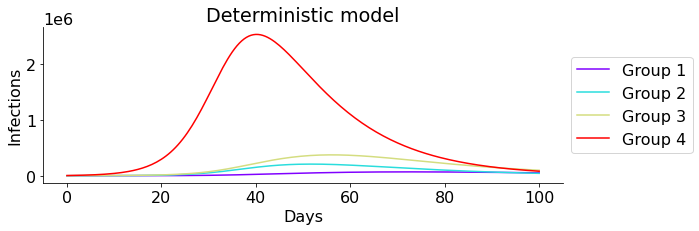

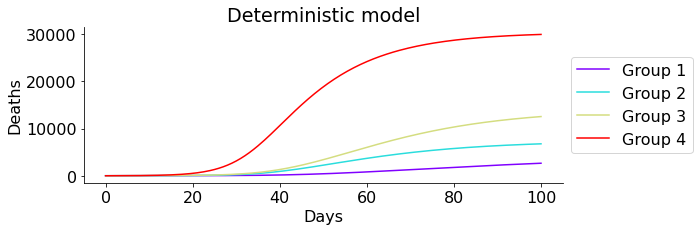

In [175]:
color = cm.rainbow(np.linspace(0, 1, m))

# Infections by group 

fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i,c in enumerate(color):
    ax.plot(np.arange(0,  end_t+delta_t, delta_t), SIR_det[2*m+1+2*i]+SIR_det[2*m+2+2*i], c=c, label = f'Group {i+1}')
ax.set_xlabel('Days')
ax.set_ylabel('Infections')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Deterministic model')
plt.tight_layout()
plt.show()

# Deaths by group 

fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i,c in enumerate(color): 
    ax.plot(np.arange(0,  end_t+delta_t, delta_t), SIR_det[6*m+1+2*i]+SIR_det[6*m+2+2*i], c=c, label = f'Group {i+1}')
ax.set_xlabel('Days')
ax.set_ylabel('Deaths')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Deterministic model')
plt.tight_layout()
plt.show()


## Stochastic

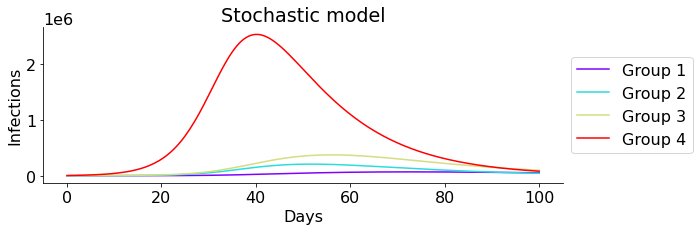

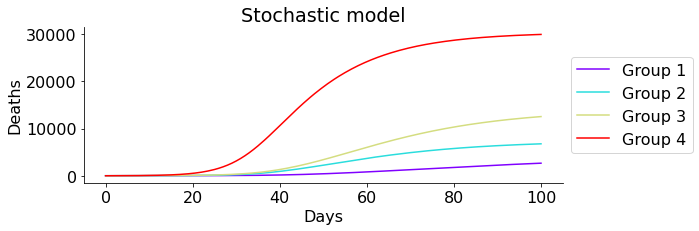

In [176]:
# Means

color = cm.rainbow(np.linspace(0, 1, m))

# Infections by group 

fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i,c in enumerate(color):
    ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[2*m+1+2*i]+df_means[2*m+2+2*i], c=c, label = f'Group {i+1}')
#     ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[8*m+1+i], c=c, label = f'Group {i+1}')
ax.set_xlabel('Days')
ax.set_ylabel('Infections')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Stochastic model')
plt.tight_layout()
plt.show()

# Deaths by group 

fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i,c in enumerate(color): 
    ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[6*m+1+2*i]+df_means[6*m+2+2*i], c=c, label = f'Group {i+1}')
#     ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[9*m+1+i], c=c, label = f'Group {i+1}')
ax.set_xlabel('Days')
ax.set_ylabel('Deaths')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Stochastic model')
plt.tight_layout()
plt.show()


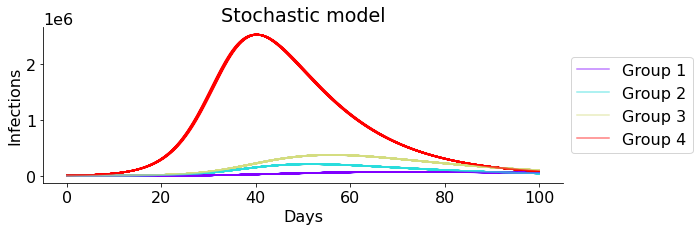

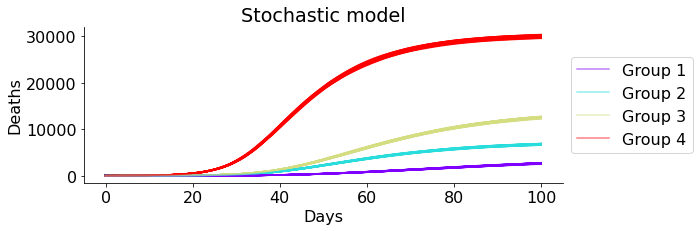

In [177]:
color = cm.rainbow(np.linspace(0, 1, m))

# Infections by group 

fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for k in range(n_iter): 
    for i,c in enumerate(color):
        if k == 0: 
            ax.plot(np.arange(0,  end_t+delta_t, delta_t), dataset[k][2*m+1+2*i]+dataset[k][2*m+2+2*i], c=c, alpha=0.5, label = f'Group {i+1}')
        else: 
            ax.plot(np.arange(0,  end_t+delta_t, delta_t), dataset[k][2*m+1+2*i]+dataset[k][2*m+2+2*i], c=c, alpha=0.5)
ax.set_xlabel('Days')
ax.set_ylabel('Infections')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Stochastic model')
plt.tight_layout()
plt.show()

# Deaths by group 

fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for k in range(n_iter): 
    for i,c in enumerate(color):
        if k == 0: 
            ax.plot(np.arange(0,  end_t+delta_t, delta_t), dataset[k][6*m+1+2*i]+dataset[k][6*m+2+2*i], c=c, alpha=0.5, label = f'Group {i+1}')
        else: 
            ax.plot(np.arange(0,  end_t+delta_t, delta_t), dataset[k][6*m+1+2*i]+dataset[k][6*m+2+2*i], c=c, alpha=0.5)
ax.set_xlabel('Days')
ax.set_ylabel('Deaths')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Stochastic model')
plt.tight_layout()
plt.show()


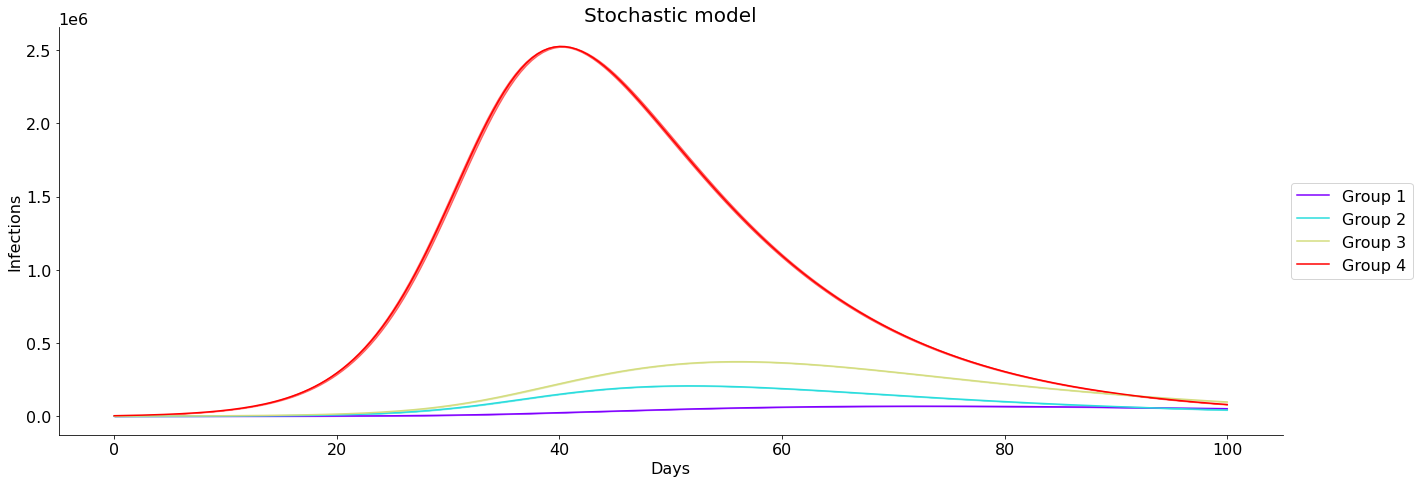

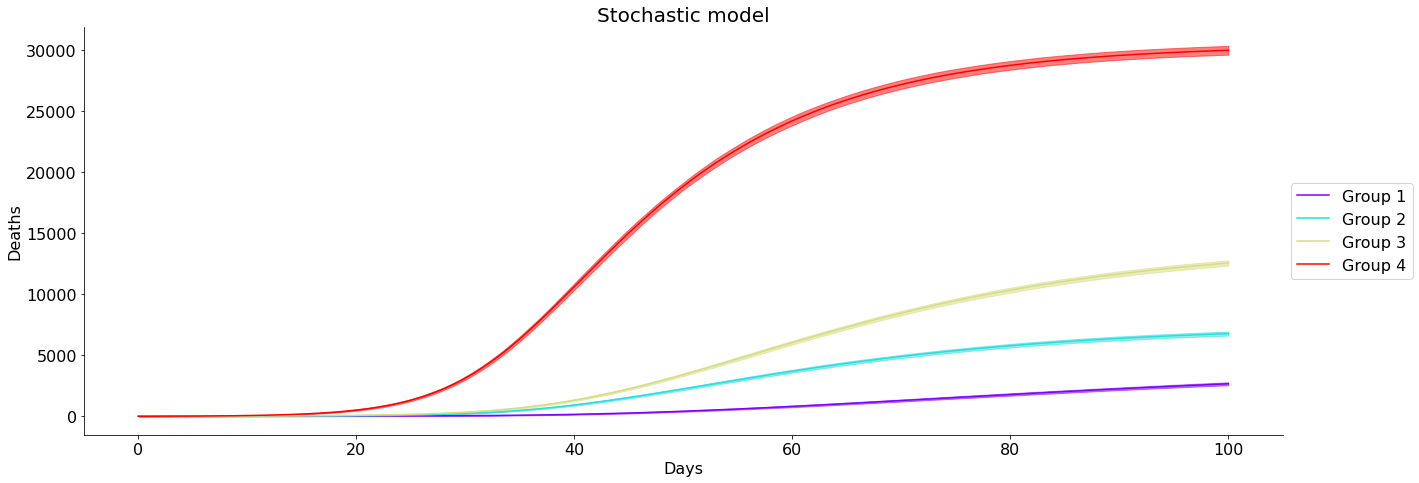

In [178]:
# Means

color = cm.rainbow(np.linspace(0, 1, m))
plt.rcParams['font.size'] = '16'
# Infections by group 

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i,c in enumerate(color):
    ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[8*m+1+i], c=c, label = f'Group {i+1}')
    plt.fill_between(np.arange(0,  end_t+delta_t, delta_t), df_means[8*m+1+i]-1.96*df_std[8*m+1+i], \
                     df_means[8*m+1+i]+1.96*df_std[8*m+1+i], color=c, alpha=0.5)
ax.set_xlabel('Days')
ax.set_ylabel('Infections')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Stochastic model', fontsize=20)
plt.tight_layout()
plt.show()

# Deaths by group 

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i,c in enumerate(color): 
    ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[9*m+1+i], c=c, label = f'Group {i+1}')
    plt.fill_between(np.arange(0,  end_t+delta_t, delta_t), df_means[9*m+1+i]-1.96*df_std[9*m+1+i], \
                     df_means[9*m+1+i]+1.96*df_std[9*m+1+i], color=c, alpha=0.5)
ax.set_xlabel('Days')
ax.set_ylabel('Deaths')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Stochastic model', fontsize=20)
plt.tight_layout()
plt.show()


    


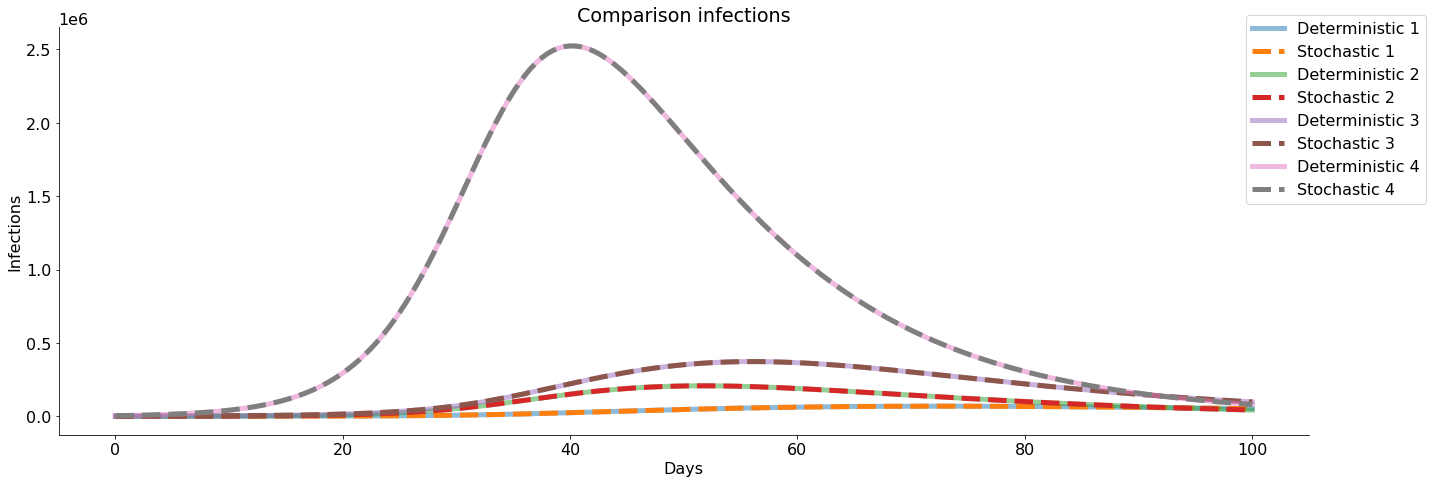

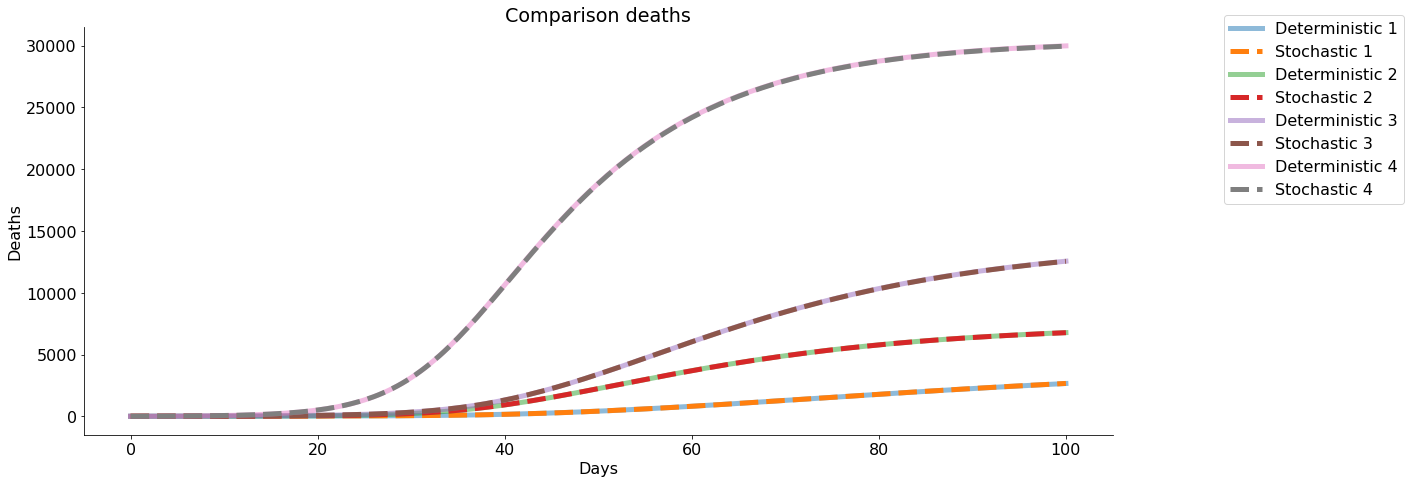

In [180]:
# Infections by group 

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in range(m):
    ax.plot(np.arange(0,  end_t+delta_t, delta_t), SIR_det[2*m+1+2*i]+SIR_det[2*m+2+2*i], linewidth = 5, label = f'Deterministic {i+1}', alpha = 0.5)
    ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[8*m+1+i], linewidth = 5, label = f'Stochastic {i+1}', linestyle = '--')
ax.set_xlabel('Days')
ax.set_ylabel('Infections')
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.title('Comparison infections')
plt.tight_layout()
plt.show()

# Deaths by group 

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in range(m): 
    ax.plot(np.arange(0,  end_t+delta_t, delta_t), SIR_det[6*m+1+2*i]+SIR_det[6*m+2+2*i], linewidth = 5, label = f'Deterministic {i+1}', alpha = 0.5)
    ax.plot(np.arange(0,  end_t+delta_t, delta_t), df_means[9*m+1+i], linewidth = 5, label = f'Stochastic {i+1}', linestyle = '--')
ax.set_xlabel('Days')
ax.set_ylabel('Deaths')
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.title('Comparison deaths')
plt.tight_layout()
plt.show()
